In [64]:
import wikipedia as wiki
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import pandas as pd
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [179]:
url = 'https://www.worldometers.info/world-population/population-by-country/'

In [180]:
df = pd.read_html(url)
df = df[0]
df = df.rename(columns={'Country (or dependency)': 'Country'})
df = df.drop('#',1)
df = df.set_index('Country')
df.head(15)

,Population (2019),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
Country,,,,,,,,,,
China,1433783686,0.43 %,6135900,153,9388211,-348399.0,1.7,38,60 %,18.59 %
India,1366417754,1.02 %,13775474,460,2973190,-532687.0,2.2,28,35 %,17.71 %
United States,329064917,0.60 %,1968652,36,9147420,954806.0,1.8,38,82 %,4.27 %
Indonesia,270625568,1.10 %,2955025,149,1811570,-98955.0,2.3,30,56 %,3.51 %
Pakistan,216565318,2.04 %,4337032,281,770880,-233379.0,3.6,23,35 %,2.81 %
Brazil,211049527,0.75 %,1580204,25,8358140,21200.0,1.7,33,87 %,2.74 %
Nigeria,200963599,2.60 %,5088916,221,910770,-60000.0,5.4,18,51 %,2.61 %
Bangladesh,163046161,1.03 %,1669453,1253,130170,-369501.0,2.1,28,39 %,2.11 %
Russia,145872256,0.09 %,138218,9,16376870,182456.0,1.8,40,74 %,1.89 %


In [181]:
url = 'https://www.worldometers.info/'
df1 = pd.read_html(url)
df1 = df1[0]
df1 = df1.drop('#',1)
df1 = df1.set_index('Country')
df1.head(15)

,"GDP (nominal, 2017)",GDP growth,Population (2017),GDP per capita,Share of World GDP
Country,,,,,
United States,"$19,485,394,000,000",2.27%,325084756,"$59,939",24.08%
China,"$12,237,700,479,375",6.90%,1421021791,"$8,612",15.12%
Japan,"$4,872,415,104,315",1.71%,127502725,"$38,214",6.02%
Germany,"$3,693,204,332,230",2.22%,82658409,"$44,680",4.56%
India,"$2,650,725,335,364",6.68%,1338676785,"$1,980",3.28%
United Kingdom,"$2,637,866,340,434",1.79%,66727461,"$39,532",3.26%
France,"$2,582,501,307,216",1.82%,64842509,"$39,827",3.19%
Brazil,"$2,053,594,877,013",0.98%,207833823,"$9,881",2.54%
Italy,"$1,943,835,376,342",1.50%,60673701,"$32,038",2.40%


In [190]:
df_all = df.join(df1,on='Country')

In [185]:
df_all.head(10)

,Population (2019),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,"GDP (nominal, 2017)",GDP growth,Population (2017),GDP per capita,Share of World GDP
Country,,,,,,,,,,,,,,,
China,1433783686,0.43 %,6135900,153,9388211,-348399.0,1.7,38,60 %,18.59 %,"$12,237,700,479,375",6.90%,1.421022e+09,"$8,612",15.12%
India,1366417754,1.02 %,13775474,460,2973190,-532687.0,2.2,28,35 %,17.71 %,"$2,650,725,335,364",6.68%,1.338677e+09,"$1,980",3.28%
United States,329064917,0.60 %,1968652,36,9147420,954806.0,1.8,38,82 %,4.27 %,"$19,485,394,000,000",2.27%,3.250848e+08,"$59,939",24.08%
Indonesia,270625568,1.10 %,2955025,149,1811570,-98955.0,2.3,30,56 %,3.51 %,"$1,015,420,587,285",5.07%,2.646510e+08,"$3,837",1.25%
Pakistan,216565318,2.04 %,4337032,281,770880,-233379.0,3.6,23,35 %,2.81 %,"$304,951,818,494",5.70%,2.079062e+08,"$1,467",0.38%
Brazil,211049527,0.75 %,1580204,25,8358140,21200.0,1.7,33,87 %,2.74 %,"$2,053,594,877,013",0.98%,2.078338e+08,"$9,881",2.54%
Nigeria,200963599,2.60 %,5088916,221,910770,-60000.0,5.4,18,51 %,2.61 %,"$375,745,486,521",0.81%,1.908732e+08,"$1,969",0.46%
Bangladesh,163046161,1.03 %,1669453,1253,130170,-369501.0,2.1,28,39 %,2.11 %,"$249,723,862,487",7.28%,1.596854e+08,"$1,564",0.31%
Russia,145872256,0.09 %,138218,9,16376870,182456.0,1.8,40,74 %,1.89 %,"$1,578,417,211,937",1.55%,1.455301e+08,"$10,846",1.95%


In [192]:
df_all.sort_values(['GDP (nominal, 2017)',''])

,Population (2019),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,"GDP (nominal, 2017)",GDP growth,Population (2017),GDP per capita,Share of World GDP
Country,,,,,,,,,,,,,,,
Indonesia,270625568,1.10 %,2955025,149,1811570,-98955.0,2.3,30,56 %,3.51 %,"$1,015,420,587,285",5.07%,264650963.0,"$3,837",1.25%
Comoros,850886,2.23 %,18564,457,1861,-2000.0,4.2,20,29 %,0.01 %,"$1,068,124,330",2.71%,813892.0,"$1,312",0.00%
Grenada,112003,0.49 %,549,329,340,-200.0,2.1,32,35 %,0.00 %,"$1,126,882,296",5.06%,110874.0,"$10,164",0.00%
Mexico,127575529,1.10 %,1384741,66,1943950,-60000.0,2.1,29,83 %,1.65 %,"$1,150,887,823,404",2.04%,124777324.0,"$9,224",1.42%
Solomon Islands,669823,2.60 %,16966,24,27990,-1600.0,4.4,20,23 %,0.01 %,"$1,303,453,622",3.24%,636039.0,"$2,049",0.00%
Spain,46736776,0.09 %,43918,94,498800,40000.0,1.3,45,80 %,0.61 %,"$1,314,314,164,402",3.05%,46647428.0,"$28,175",1.62%
Australia,25203198,1.23 %,305046,3,7682300,158246.0,1.8,38,86 %,0.33 %,"$1,323,421,072,479",1.96%,24584620.0,"$53,831",1.64%
Guinea-Bissau,1920922,2.49 %,46619,68,28120,-1399.0,4.5,19,45 %,0.02 %,"$1,346,841,897",5.92%,1828145.0,$737,0.00%
Gambia,2347706,2.97 %,67612,232,10120,-3087.0,5.3,18,59 %,0.03 %,"$1,489,464,788",4.56%,2213889.0,$673,0.00%


In [239]:
new_df = df_all.loc[['United States','Japan'],['Population (2019)','GDP (nominal, 2017)']]
new_df

,Population (2019),"GDP (nominal, 2017)"
Country,,
United States,329064917,"$19,485,394,000,000"
Japan,126860301,"$4,872,415,104,315"


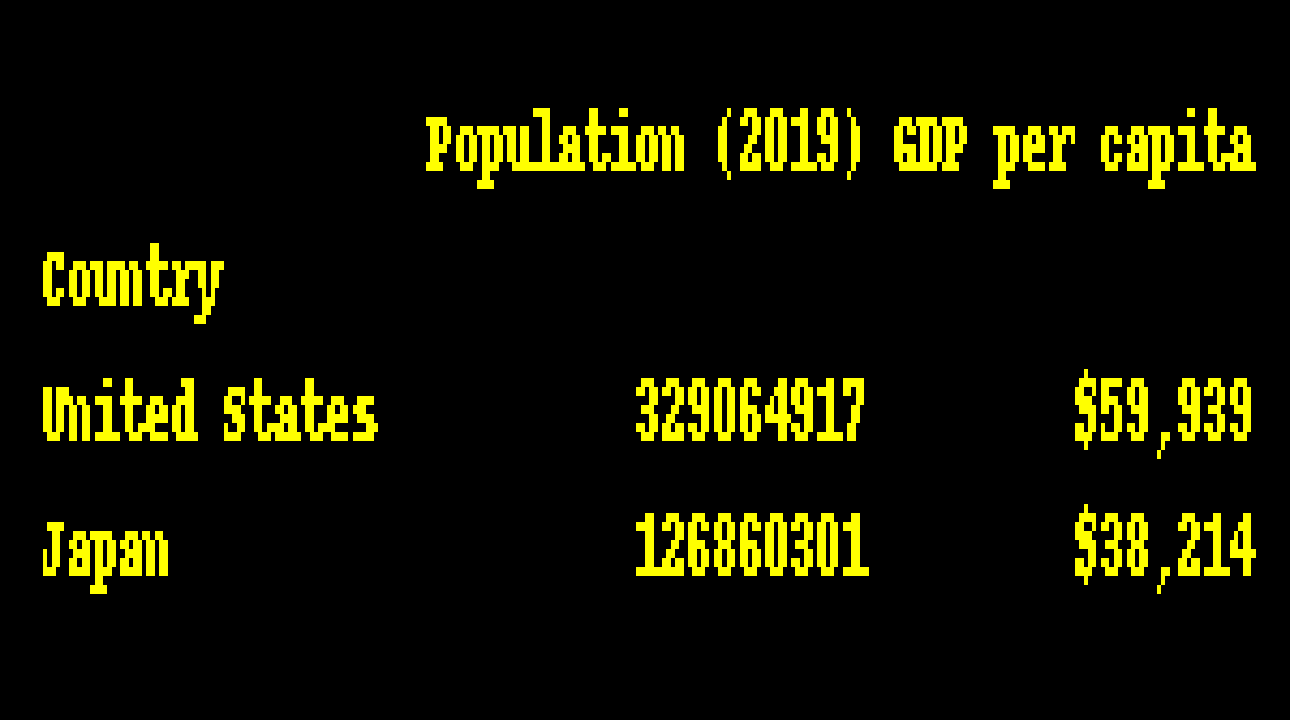

In [241]:
def compare_countries(country_1='United States',country_2='Japan'):
    
    '''get the data from internet and show them on screen!!'''
    # the intial url for the information source
    url = 'https://www.worldometers.info/'
    
    
    # read the first table as datafram
    df = pd.read_html(url+ 'world-population/population-by-country/')
    df = df[0]
    # change the country column to be same in all tables
    df = df.rename(columns={'Country (or dependency)': 'Country'})
    # remove unuseful column
    df = df.drop('#',1)
    # set the key as country name
    df = df.set_index('Country')
    
    
    # read the second table as datafram
    df1 = pd.read_html(url+'gdp/gdp-by-country/')
    df1 = df1[0]
    # remove unuseful column
    df1 = df1.drop('#',1)
    # set the key as country name
    df1 = df1.set_index('Country')
    
    # join two tables
    df_all = df.join(df1,on='Country')
    
    # select the countries to be compared
    new_df = df_all.loc[[country_1, country_2],['Population (2019)','GDP per capita']]
    
    # make background image for visializing result
    img = Image.new('RGB', (300, 80), color = (0, 0, 0))
    
    # draw the results on background image
    d = ImageDraw.Draw(img)
    d.text((10,10), str(new_df), fill=(255,255,0))
    img = img.resize((1290,720))
#     plt.imshow(img)
#     plt.show
    return img


compare_countries()

<function matplotlib.pyplot.show(*args, **kw)>

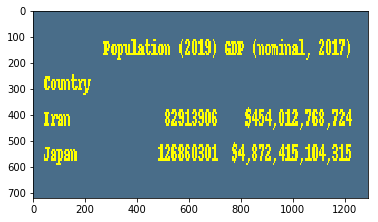

In [229]:
img = Image.new('RGB', (300, 80), color = (73, 109, 137))
 
d = ImageDraw.Draw(img)
d.text((10,10), str(new_df), fill=(255,255,0))
img = img.resize((1290,720))
plt.imshow(img)
plt.show